# Detection d'anomalies

In [2]:
import numpy as np
np.set_printoptions(threshold=None)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
warnings.filterwarnings('ignore')

## 1. Sur la base de données Mouse

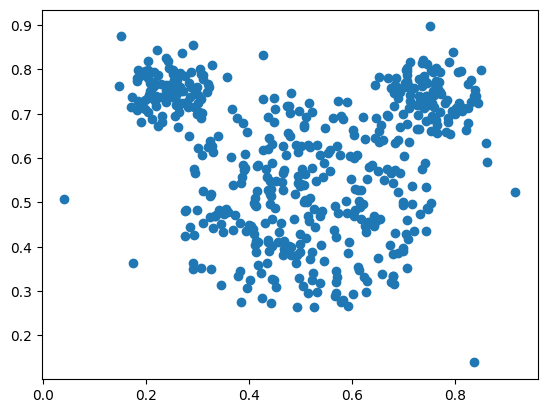

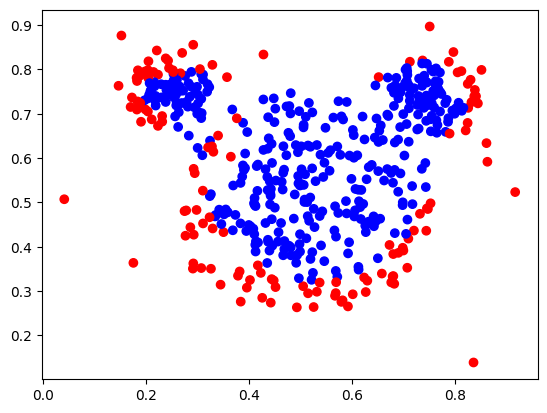

In [20]:
df = pd.read_csv('mouse.txt', sep=' ', header=None)
p = df.values
x = np.array_split(df.values, (1, ), axis=1)[0]
y = np.array_split(df.values, (1, ), axis=1)[1]

plt.scatter(x, y)
plt.show()
p_train, p_test = train_test_split(p , train_size=0.5)
clf = IsolationForest().fit(p_train)
"""prediction et affichages des anomalies"""
predict = (clf.predict(p) + 1) // 2
colors = ["red", "blue"]
plt.scatter(p[:, 0], p[:, 1], c= predict, cmap=matplotlib.colors.ListedColormap(colors))


## 2. Sur le jeu de données des cartes de crédits

ValueError: 'c' argument has 284807 elements, which is inconsistent with 'x' and 'y' with size 500.

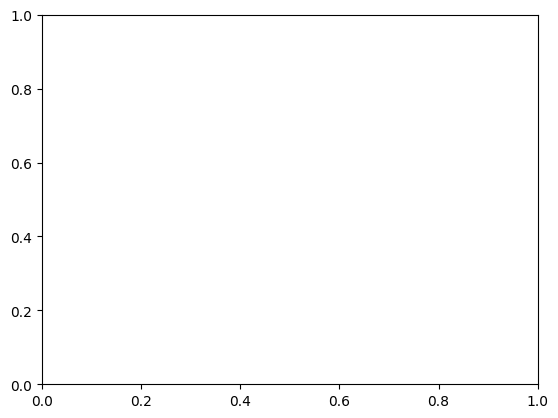

In [37]:
from sklearn.utils import shuffle
from sklearn.utils import resample

df = pd.read_csv('creditcard.csv', sep=',')
normal = [x for x in df.iloc[:, 1:].values if x[-1] == 0]
fraud = [x for x in df.iloc[:, 1:].values if x[-1] == 1]
normal = resample(normal, n_samples=5000)
total = normal + fraud

x_train, x_test = train_test_split(total , train_size=0.5)
clf = IsolationForest().fit(x_train)
"""prediction et affichages des anomalies"""
predict = (clf.predict(df.iloc[:, 1:].values) + 1) // 2
colors = ["red", "blue"]
plt.scatter(p[:, 0], p[:, 1], c = predict, cmap=matplotlib.colors.ListedColormap(colors))
